# Business Problem 
### Problem Context
Patients with Liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs. This dataset was used to evaluate prediction algorithms in an effort to reduce burden on doctors.

### Content
This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records.

Any patient whose age exceeded 89 is listed as being of age "90".

### Features:

* Age of the patient
* Gender of the patient
* Total Bilirubin
* Direct Bilirubin
* Alkaline Phosphotase
* Alamine Aminotransferase
* Aspartate Aminotransferase
* Total Protiens
* Albumin
* Albumin and Globulin Ratio
* Dataset: field used to split the data into two sets (patient with liver disease, or no disease)

##  Mapping business problem to ML problem

###  Type of Machine Learning Problem

It is a binary classification problem, where given the above set of features, we need to predict if a given patient has liver disease or not

###  Evaluation Metric (KPI)

Since this is binary classification problem, we use the following metrics:
* **Confusion matrix** - For getting a better clarity of the no of correct/incorrect predictions by the model
* **ROC-AUC** - It considers the rank of the output probabilities and intuitively measures the likelihood that model can distinguish between a positive point and a negative point. (**Note:** ROC-AUC is typically used for binary classification only). We will use AUC to select the best model.

In [1]:
!pip install scikit-learn

# for numerical computing
import numpy as np

# for dataframes
import pandas as pd

# for easier visualization
import seaborn as sns

# for visualization and to display plots
from matplotlib import pyplot as plt
%matplotlib inline

# import color maps
from matplotlib.colors import ListedColormap

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

from math import sqrt

# to split train and test set
from sklearn.model_selection import train_test_split

# to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import cross_val_score

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
import xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance  # to plot feature importance

# to save the final model on disk
import joblib

You should consider upgrading via the 'C:\Users\Puneet\Documents\Cirrhosis\liverr2\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
df=pd.read_csv('indian_liver_patient.csv')

In [3]:
df.shape

(583, 11)

In [4]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [5]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


## Exploratory Data Analysis

Filtering categorical data

In [6]:
df.dtypes[df.dtypes=='object']

Gender    object
dtype: object

## Distribution of Numerical Features

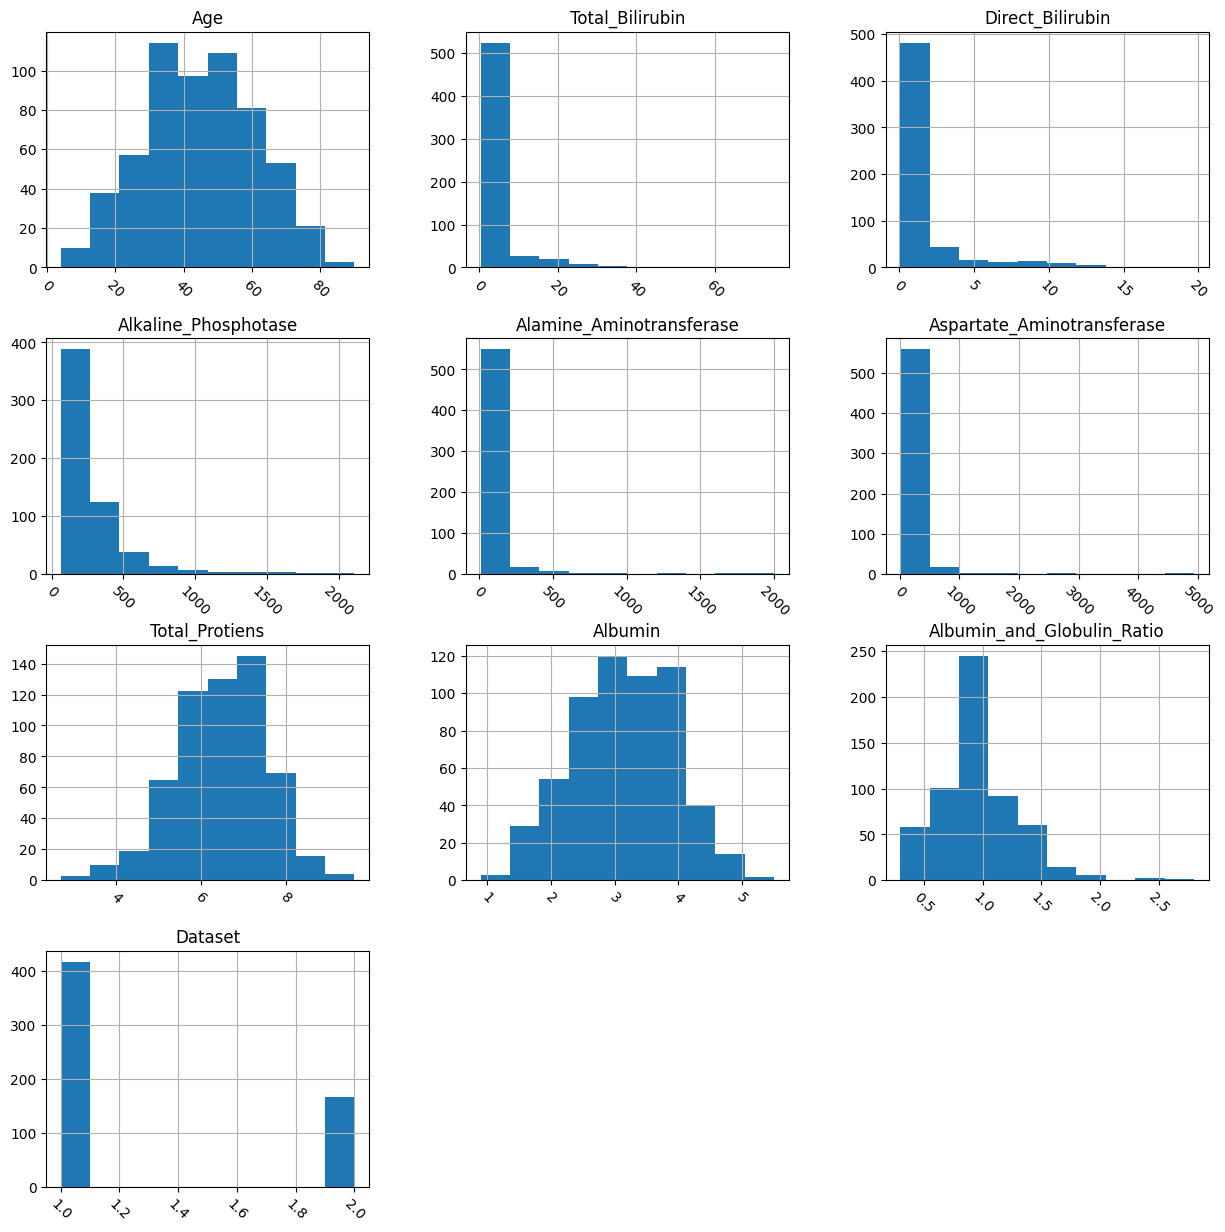

In [7]:
# Plot histogram grid
df.hist(figsize=(15,15), xrot=-45, bins=10) ## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()

In [8]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


It seems there is outlier in Aspartate_Aminotransferase as the max value is very high than mean value

Dataset i.e output value has '1' for liver disease and '2' for no liver disease so let's make it 0 for no disease to make it convinient

In [9]:
## if score==negative, mark 0 ;else 1 
def partition(x):
    if x == 2:
        return 0
    return 1

df['Dataset'] = df['Dataset'].map(partition)

## Distribution of categorical data

In [10]:
df.describe(include=['object'])

,Gender
count,583
unique,2
top,Male
freq,441


## Bar plots for categorical Features

<Axes: xlabel='count', ylabel='Gender'>

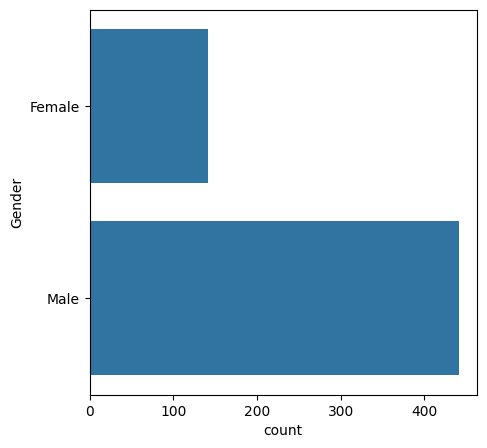

In [11]:
plt.figure(figsize=(5,5))
sns.countplot(y='Gender', data=df)

In [12]:
df[df['Gender'] == 'Male'][['Dataset', 'Gender']].head()

,Dataset,Gender
1,1,Male
2,1,Male
3,1,Male
4,1,Male
5,1,Male


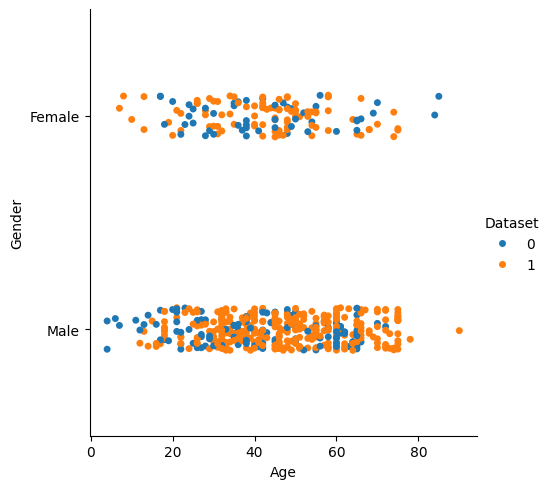

In [13]:
sns.catplot(x="Age", y="Gender", hue="Dataset", data=df);

Age seems to be a factor for liver disease for both male and female genders

Number of patients that are male:  441
Number of patients that are female:  142


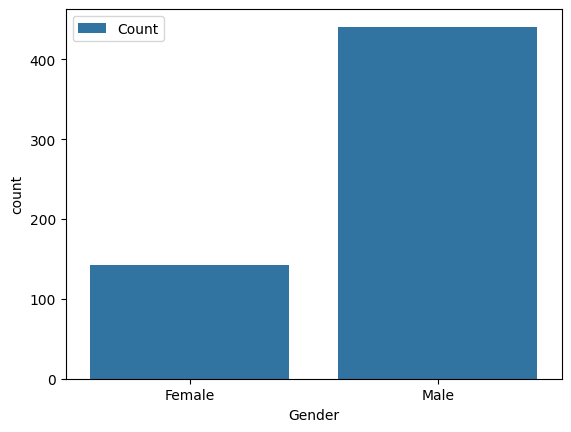

In [14]:
sns.countplot(data=df, x = 'Gender', label='Count')

M, F = df['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

There are more male patients than female patients

Label Male as 0 and Female as 1

In [15]:
## if score==negative, mark 0 ;else 1 
def partition(x):
    if x =='Male':
        return 0
    return 1

df['Gender'] = df['Gender'].map(partition)

#### 2-D Scatter Plot

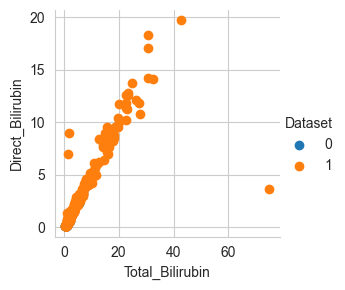

In [16]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(df, hue = 'Dataset').map(plt.scatter, 'Total_Bilirubin', 'Direct_Bilirubin').add_legend()

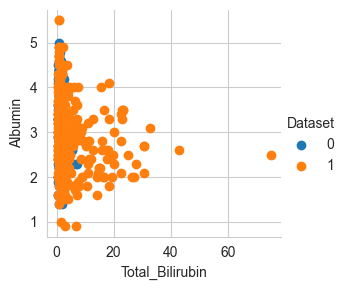

In [17]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(df, hue = 'Dataset').map(plt.scatter, 'Total_Bilirubin', 'Albumin').add_legend()

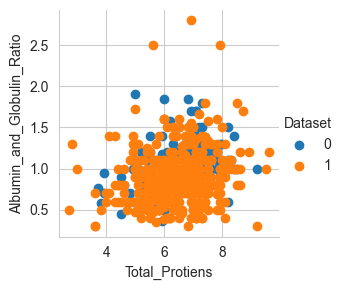

In [18]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(df, hue = 'Dataset').map(plt.scatter, 'Total_Protiens', 'Albumin_and_Globulin_Ratio').add_legend()

## Correlations
* Finally, let's take a look at the relationships between numeric features and other numeric features.
* ***Correlation*** is a value between -1 and 1 that represents how closely values for two separate features move in unison.
* Positive correlation means that as one feature increases, the other increases; eg. a child's age and her height.
* Negative correlation means that as one feature increases, the other decreases; eg. hours spent studying and number of parties attended.
* Correlations near -1 or 1 indicate a strong relationship.
* Those closer to 0 indicate a weak relationship.
* 0 indicates no relationship.

In [19]:
df.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,-0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Gender,-0.056560,1.000000,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003424,-0.082416
Total_Bilirubin,0.011763,-0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,-0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,-0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,-0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,0.003424,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131


<Axes: >

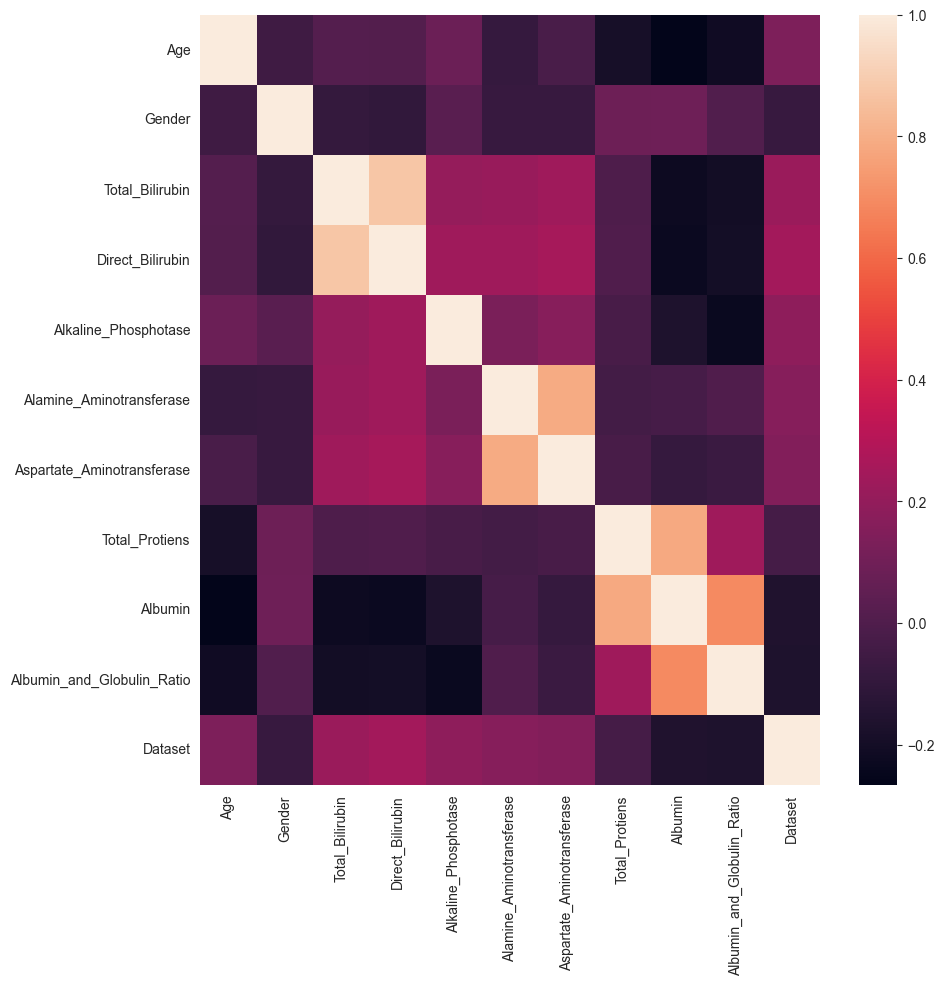

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

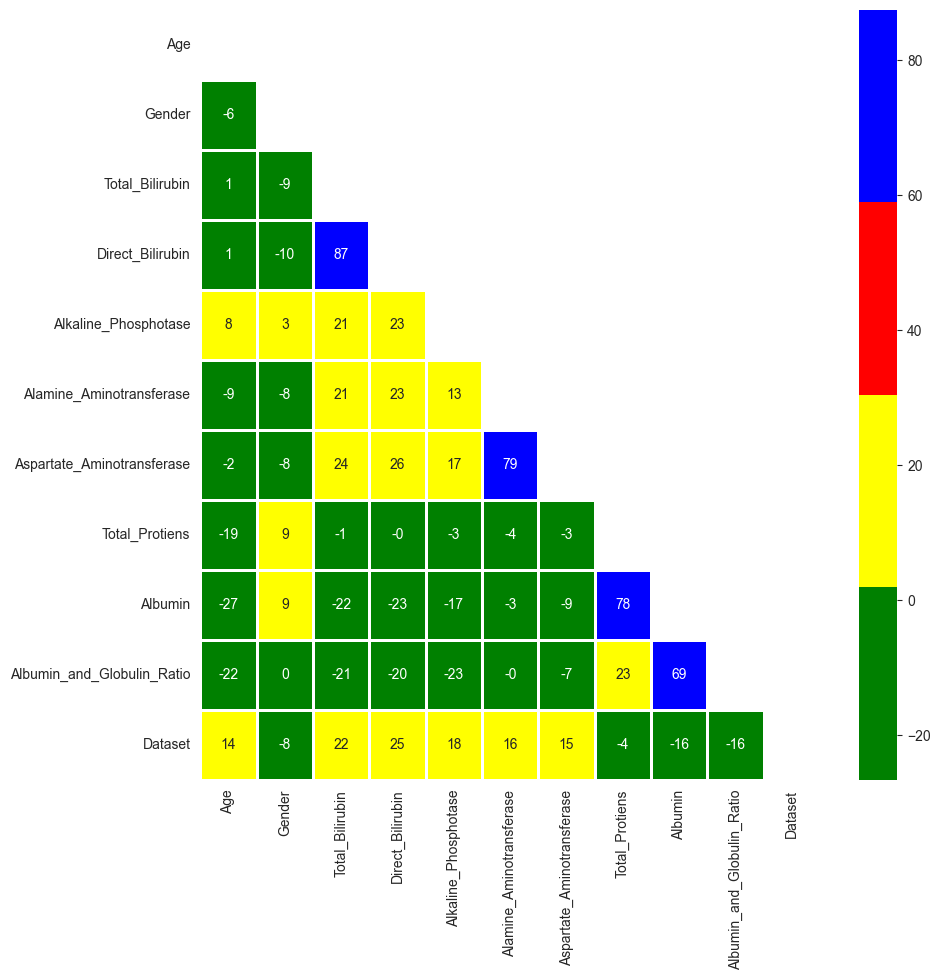

In [21]:
mask=np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    ax = sns.heatmap(df.corr()*100, mask=mask, fmt='.0f', annot=True, lw=1, cmap=ListedColormap(['green', 'yellow', 'red','blue']))

## Data Cleaning

In [22]:
df = df.drop_duplicates()
print( df.shape )

(570, 11)


There were 13 duplicates

## Removing Outliers

<Axes: ylabel='Aspartate_Aminotransferase'>

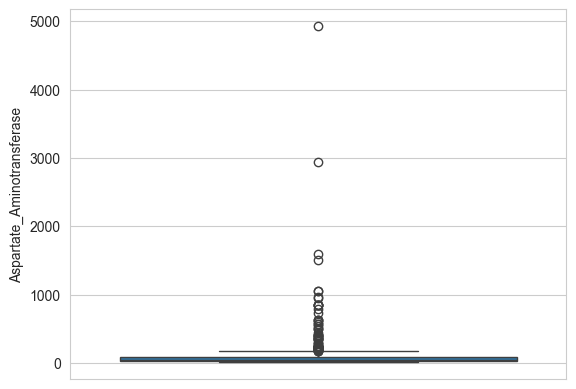

In [23]:
sns.boxplot(df.Aspartate_Aminotransferase)

In [24]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

135    4929
117    2946
118    1600
207    1500
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [25]:
df = df[df.Aspartate_Aminotransferase <=3000 ]
df.shape

(569, 11)

<Axes: ylabel='Aspartate_Aminotransferase'>

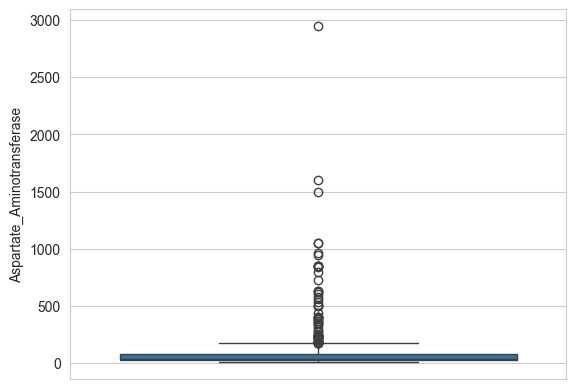

In [26]:
sns.boxplot(df.Aspartate_Aminotransferase)

In [27]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

117    2946
118    1600
207    1500
119    1050
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [28]:
df = df[df.Aspartate_Aminotransferase <=2500 ]
df.shape

(568, 11)

In [29]:
df.isnull().values.any()

True

In [30]:
df.shape

(568, 11)

In [31]:
df=df.dropna(how='any')  

In [32]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


## Machine Learning Models

### Data Preparation

In [33]:
# Create separate object for target variable
y = df.Dataset

# Create separate object for input features
X = df.drop('Dataset', axis=1)

In [34]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.05, 
                                                    random_state=1234,
                                                    stratify=df.Dataset)

In [35]:
# Print number of observations in X_train, X_test, y_train, and y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(535, 10) (29, 10) (535,) (29,)


### Data standardization
* In Data Standardization we perform zero mean centring and unit scaling; i.e. we make the mean of all the features as zero and the standard deviation as 1.
* Thus we use **mean** and **standard deviation** of each feature.
* It is very important to save the **mean** and **standard deviation** for each of the feature from the **training set**, because we use the same mean and standard deviation in the test set.

In [36]:
train_mean = X_train.mean()
train_std = X_train.std()

In [37]:
# Standardize the train data set
X_train = (X_train - train_mean) / train_std

In [38]:
## Check for mean and std dev.
X_train.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,5.350000e+02,5.350000e+02,5.350000e+02,5.350000e+02,5.350000e+02,5.350000e+02,5.350000e+02,5.350000e+02,5.350000e+02,5.350000e+02
mean,2.058582e-16,7.304645e-17,-2.988264e-17,6.640586e-17,4.648410e-17,-9.130806e-18,1.992176e-17,4.648410e-16,8.632762e-17,2.390611e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.500628e+00,-5.717790e-01,-4.697606e-01,-4.984483e-01,-9.239732e-01,-4.132253e-01,-5.014205e-01,-3.520418e+00,-2.832543e+00,-2.031201e+00
25%,-7.291452e-01,-5.717790e-01,-4.074828e-01,-4.639413e-01,-4.719445e-01,-3.294943e-01,-4.154342e-01,-6.590539e-01,-7.016928e-01,-7.877034e-01
50%,3.882076e-03,-5.717790e-01,-3.763439e-01,-4.294344e-01,-3.347215e-01,-2.522042e-01,-3.237155e-01,7.936252e-02,-7.497219e-02,2.057001e-02
75%,7.979950e-01,-5.717790e-01,-1.116634e-01,-8.436469e-02,2.447986e-02,-8.796267e-02,-6.289052e-02,6.331749e-01,8.024367e-01,4.557941e-01
max,2.752735e+00,1.745659e+00,1.114504e+01,6.264917e+00,7.337658e+00,1.034298e+01,8.613124e+00,2.848424e+00,2.933287e+00,5.740659e+00


In [39]:
# Note: We use train_mean and train_std_dev to standardize test data set
X_test = (X_test - train_mean) / train_std

In [40]:
# Check for mean and std dev. - not exactly 0 and 1
X_test.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,-0.076161,-0.092309,-0.330173,-0.363990,-0.050394,0.063619,-0.128418,-0.334405,-0.321338,-0.314960
std,0.885983,0.955366,0.150577,0.180331,0.641801,1.073614,0.755641,1.060074,0.932279,0.801730
min,-2.378457,-0.571779,-0.438622,-0.498448,-0.605132,-0.361699,-0.467026,-2.689699,-2.205822,-1.720327
25%,-0.668060,-0.571779,-0.407483,-0.463941,-0.451765,-0.316613,-0.426899,-1.212866,-0.952381,-0.787703
50%,-0.179375,-0.571779,-0.407483,-0.463941,-0.350865,-0.284408,-0.363842,-0.382148,-0.200316,-0.165955
75%,0.370396,-0.571779,-0.329636,-0.360420,-0.011844,-0.155592,-0.140278,0.540873,0.426404,0.144920
max,1.531022,1.745659,0.106309,0.157184,1.606580,5.158105,3.631653,1.556195,1.679846,2.196691


In [41]:
# Data Collection to Plot N-models vs Accuracy
data = {}

##  Model-1 Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

# Initialize lists to store accuracy scores
train_accuracies = []
test_accuracies = []

# Loop for 5 times
for _ in range(5):
    # Perform grid search
    tuned_params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'penalty': ['l1', 'l2']}
    model = GridSearchCV(LogisticRegression(), tuned_params, scoring='roc_auc', n_jobs=-1)
    model.fit(X_train, y_train)
    
    # Get best estimator
    best_model = model.best_estimator_

    # Predict Train set results
    y_train_pred = best_model.predict(X_train)

    # Predict Test set results
    y_pred = best_model.predict(X_test)

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_pred)
    
    # Append accuracies to the lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Print average accuracies
print("Average Train Accuracy:", np.mean(train_accuracies))
print("Average Test Accuracy:", np.mean(test_accuracies))


Average Train Accuracy: 0.7327102803738318
Average Test Accuracy: 0.7241379310344828


In [43]:
# Get just the prediction for the positive class (1)
y_pred_proba = model.predict_proba(X_test)[:,1]

In [44]:
# Display first 10 predictions
y_pred_proba[:10]

array([0.59689678, 0.49003773, 0.60676337, 0.53618168, 0.99990838,
       0.47331983, 0.51970708, 0.94166136, 0.59234067, 0.72718798])

In [45]:
i=28  ## Change the value of i to get the details of any point (56, 213, etc.)
print('For test point {}, actual class = {}, precited class = {}, predicted probability = {}'.
      format(i, y_test.iloc[i], y_pred[i], y_pred_proba[i]))

For test point 28, actual class = 0, precited class = 1, predicted probability = 0.5486068656047709


In [46]:
confusion_matrix(y_test, y_pred).T

array([[ 2,  2],
       [ 6, 19]], dtype=int64)

In [47]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

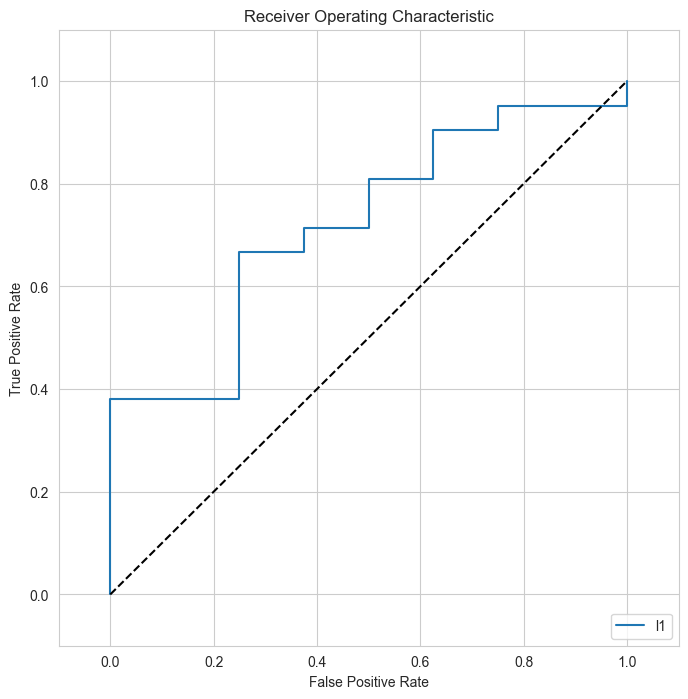

In [48]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [49]:
# Calculate AUC for Train set
print(roc_auc_score(y_train, y_train_pred))

0.5918123870879777


In [50]:
# Calculate AUC for Test set
print(auc(fpr, tpr))

0.7202380952380952


In [51]:
data["Logistic"] = {"train_accuracy": np.mean(train_accuracies), "test_accuracy": np.mean(test_accuracies)}

#### Feature Importance

In [52]:
## Building the model again with the best hyperparameters
model = LogisticRegression(C=1, penalty = 'l2')
model.fit(X_train, y_train)

LogisticRegression(C=1)

In [53]:
indices = np.argsort(-abs(model.coef_[0,:]))
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Alamine_Aminotransferase
Direct_Bilirubin
Albumin
Aspartate_Aminotransferase
Total_Protiens
Total_Bilirubin
Alkaline_Phosphotase
Age
Albumin_and_Globulin_Ratio
Gender


## Model-2 Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

# Initialize lists to store accuracy scores
train_accuracies = []
test_accuracies = []

# Loop for 5 times
for _ in range(5):
    # Perform randomized search
    tuned_params = {'n_estimators': [100, 500, 1000], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
    random = RandomizedSearchCV(RandomForestClassifier(), tuned_params, n_iter=100, scoring='roc_auc', n_jobs=-1)
    random.fit(X_train, y_train)
    
    # Get best estimator
    best_model = random.best_estimator_

    # Predict Train set results
    y_train_pred = best_model.predict(X_train)

    # Predict Test set results
    y_pred = best_model.predict(X_test)

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_pred)
    
    # Append accuracies to the lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Print average accuracies
print("Average Train Accuracy:", np.mean(train_accuracies))
print("Average Test Accuracy:", np.mean(test_accuracies))


Average Train Accuracy: 0.9327102803738316
Average Test Accuracy: 0.6344827586206897


In [55]:
# Get just the prediction for the positive class (1)
y_pred_proba = random.predict_proba(X_test)[:,1]

In [56]:
# Display first 10 predictions
y_pred_proba[:10]

array([0.51332173, 0.40271789, 0.50798144, 0.38974946, 0.92288709,
       0.58824828, 0.64300369, 0.85938023, 0.40301461, 0.67994955])

In [57]:
confusion_matrix(y_test, y_pred).T

array([[ 3,  4],
       [ 5, 17]], dtype=int64)

In [58]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

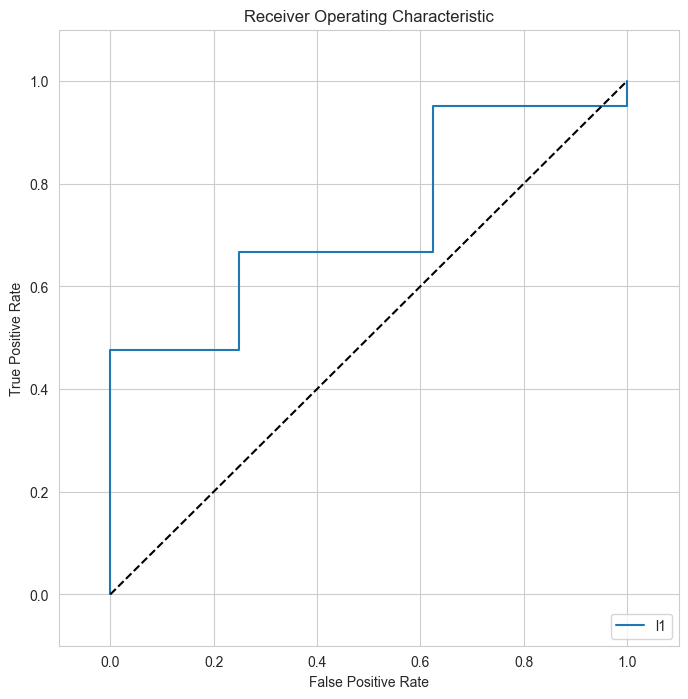

In [59]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [60]:
# Calculate AUC for Train set
roc_auc_score(y_train, y_train_pred)

0.8915448068991376

In [61]:
# Calculate AUC for Test set
print(auc(fpr, tpr))

0.7261904761904762


In [62]:
data["RandomForest"] = {"train_accuracy": np.mean(train_accuracies), "test_accuracy": np.mean(test_accuracies)}

#### Feature Importance

In [63]:
## Building the model again with the best hyperparameters
random = RandomForestClassifier(n_estimators=500, min_samples_split=2, min_samples_leaf=4)
random.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=4, n_estimators=500)

In [64]:
indices = np.argsort(-random.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Alkaline_Phosphotase
Aspartate_Aminotransferase
Total_Bilirubin
Alamine_Aminotransferase
Age
Direct_Bilirubin
Albumin
Total_Protiens
Albumin_and_Globulin_Ratio
Gender


## Model-3 XGBoost

In [65]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

# Initialize lists to store accuracy scores
train_accuracies = []
test_accuracies = []

# Loop for 5 times
for _ in range(5):
    # Perform randomized search
    tuned_params = {'max_depth': [1, 2, 3, 4, 5], 
                    'learning_rate': [0.01, 0.05, 0.1], 
                    'n_estimators': [100, 200, 300, 400, 500], 
                    'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}
    
    model = RandomizedSearchCV(XGBClassifier(), tuned_params, n_iter=15, scoring='roc_auc', n_jobs=-1)
    model.fit(X_train, y_train)
    
    # Get best estimator
    best_model = model.best_estimator_

    # Predict Train set results
    y_train_pred = best_model.predict(X_train)

    # Predict Test set results
    y_pred = best_model.predict(X_test)

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_pred)
    
    # Append accuracies to the lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Print average accuracies
print("Average Train Accuracy:", np.mean(train_accuracies))
print("Average Test Accuracy:", np.mean(test_accuracies))


Average Train Accuracy: 0.7484112149532709
Average Test Accuracy: 0.6551724137931034


In [66]:
# Get just the prediction for the positive class (1)
y_pred_proba = model.predict_proba(X_test)[:,1]

In [67]:
# Display first 10 predictions
y_pred_proba[:10]

array([0.5600551 , 0.5470128 , 0.5600551 , 0.507689  , 0.9442039 ,
       0.66309816, 0.5470128 , 0.8126741 , 0.5470128 , 0.6267503 ],
      dtype=float32)

**Note:** Just as above we can use these probabilities to get model interpretation

In [68]:
confusion_matrix(y_test, y_pred).T

array([[ 0,  0],
       [ 8, 21]], dtype=int64)

In [69]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

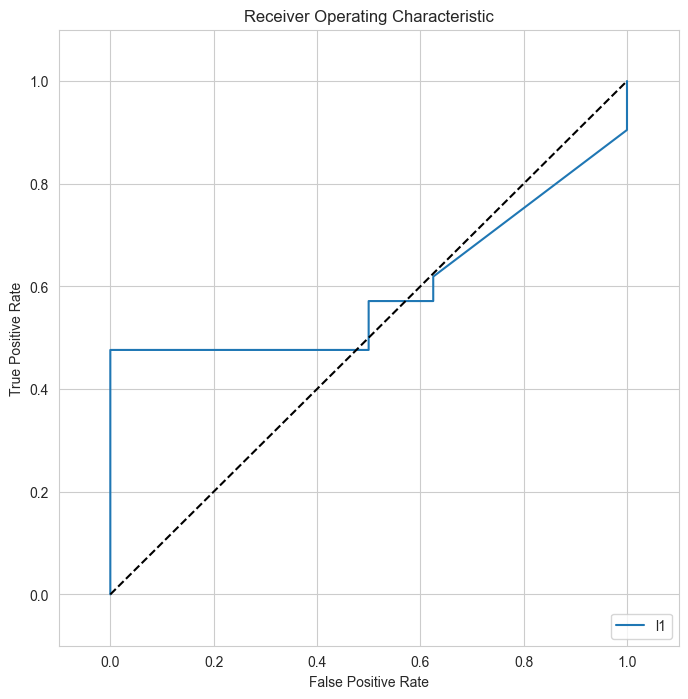

In [70]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [71]:
# Calculate AUC for Train
roc_auc_score(y_train, y_train_pred)

0.5583733851450388

In [72]:
# Calculate AUC for Test
print(auc(fpr, tpr))

0.5952380952380953


In [73]:
data["XGBoost"] = {"train_accuracy": np.mean(train_accuracies), "test_accuracy": np.mean(test_accuracies)}

#### Feature Importance

In [74]:
model = XGBClassifier(max_depth=1,learning_rate=0.05,n_estimators=500, reg_lambda=1)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [75]:
def my_plot_importance(booster, figsize, **kwargs): 
    from matplotlib import pyplot as plt
    from xgboost import plot_importance
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax, **kwargs)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

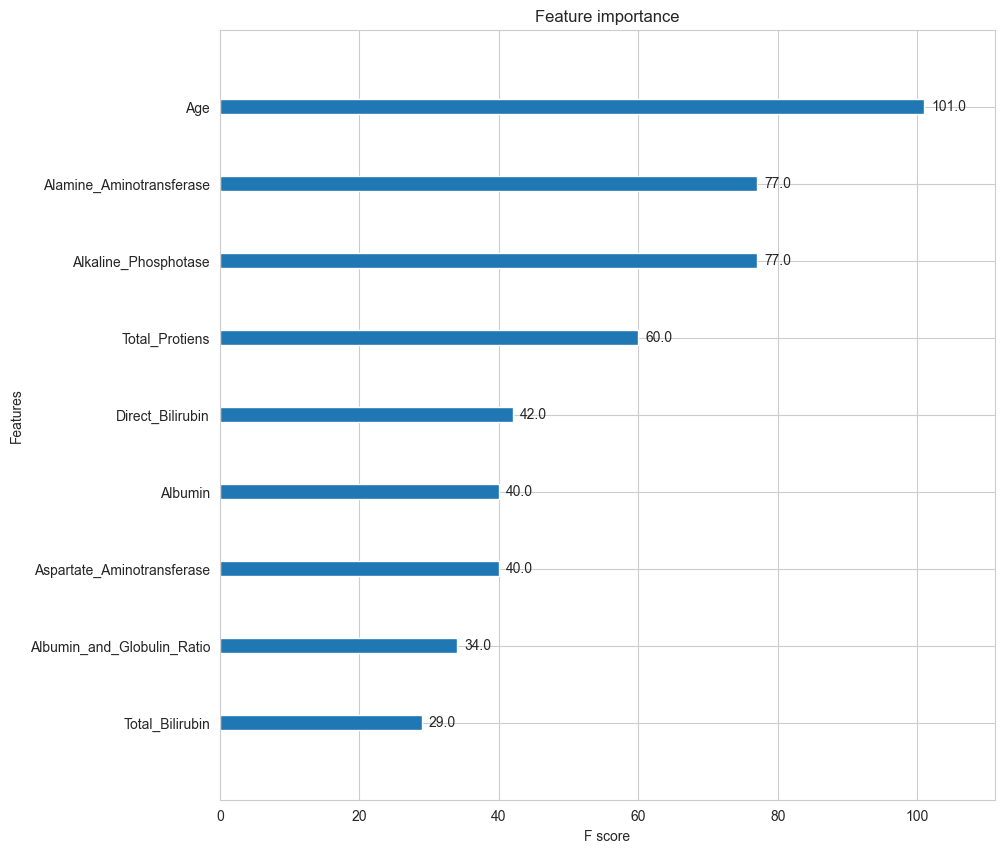

In [76]:
my_plot_importance(model, (10,10))

## Model-4 KNN

In [77]:
# creating odd list of K for KNN
neighbors = list(range(1,20,2))
# empty list that will hold cv scores
cv_scores = []

#  10-fold cross validation , 9 datapoints will be considered for training and 1 for cross validation (turn by turn) to determine value of k
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())   

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)


The optimal number of neighbors is 19.


In [78]:
MSE.index(min(MSE))

9

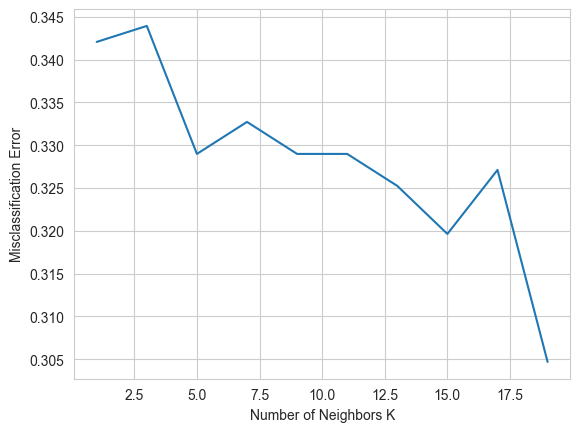

In [79]:
# plot misclassification error vs k 
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [80]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Initialize lists to store accuracy scores
train_accuracies = []
test_accuracies = []

# Loop for 5 times
for _ in range(5):
    # Instantiate KNeighborsClassifier with optimal_k (assuming you have optimal_k defined)
    classifier = KNeighborsClassifier(n_neighbors=optimal_k)
    
    # Fit the classifier on the training data
    classifier.fit(X_train, y_train)

    # Predict Train set results
    y_train_pred = classifier.predict(X_train)

    # Predict Test set results
    y_pred = classifier.predict(X_test)

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_pred)
    
    # Append accuracies to the lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Print average accuracies
print("Average Train Accuracy:", np.mean(train_accuracies))
print("Average Test Accuracy:", np.mean(test_accuracies))


Average Train Accuracy: 0.7140186915887851
Average Test Accuracy: 0.6551724137931034


In [81]:
cnf=confusion_matrix(y_test,y_pred).T
cnf

array([[ 0,  2],
       [ 8, 19]], dtype=int64)

In [82]:
# Get just the prediction for the positive class (1)
y_pred_proba = classifier.predict_proba(X_test)[:,1]

In [83]:
# Display first 10 predictions
y_pred_proba[:10]

array([0.57894737, 0.57894737, 0.68421053, 0.57894737, 1.        ,
       0.68421053, 0.68421053, 0.84210526, 0.57894737, 0.73684211])

In [84]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

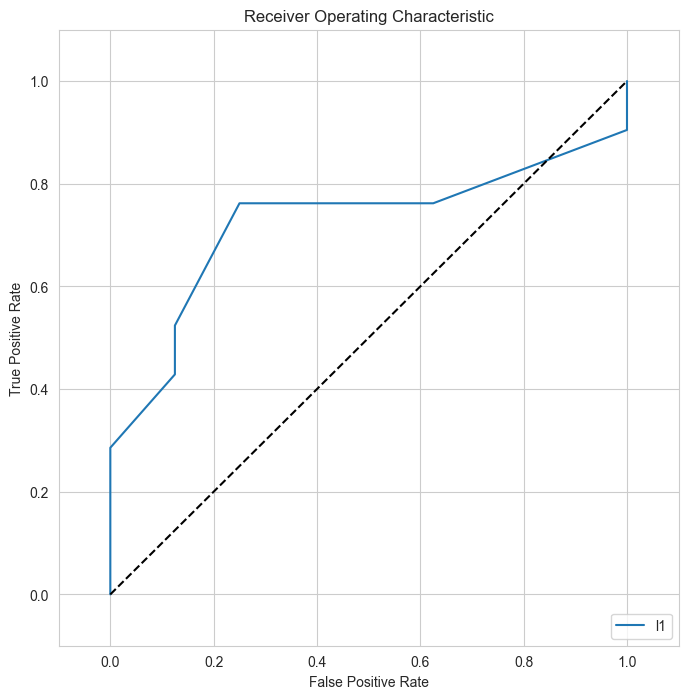

In [85]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [86]:
# Calculate AUC for Train
roc_auc_score(y_train, y_train_pred)

0.5864266966629171

In [87]:
# Calculate AUC for Test
print(auc(fpr, tpr))

0.7232142857142857


In [88]:
data["KNN"] = {"train_accuracy": np.mean(train_accuracies), "test_accuracy": np.mean(test_accuracies)}

## Model-5 Descision Trees

In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

# Initialize lists to store accuracy scores
train_accuracies = []
test_accuracies = []

# Loop for 5 times
for _ in range(5):
    # Perform randomized search
    tuned_params = {'min_samples_split': [2, 3, 4, 5, 7], 
                    'min_samples_leaf': [1, 2, 3, 4, 6], 
                    'max_depth': [2, 3, 4, 5, 6, 7]}
    
    model = RandomizedSearchCV(DecisionTreeClassifier(), tuned_params, n_iter=100, scoring='roc_auc', n_jobs=-1)
    model.fit(X_train, y_train)
    
    # Get best estimator
    best_model = model.best_estimator_

    # Predict Train set results
    y_train_pred = best_model.predict(X_train)

    # Predict Test set results
    y_pred = best_model.predict(X_test)

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_pred)
    
    # Append accuracies to the lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Print average accuracies
print("Average Train Accuracy:", np.mean(train_accuracies))
print("Average Test Accuracy:", np.mean(test_accuracies))


Average Train Accuracy: 0.7140186915887851
Average Test Accuracy: 0.48275862068965514


In [90]:
y_pred_proba = model.predict_proba(X_test)[:,1]

In [91]:
y_pred_proba[:10]

array([0.49767442, 0.49767442, 0.49767442, 0.49767442, 0.95205479,
       0.76666667, 0.49767442, 0.76666667, 0.49767442, 0.49767442])

In [92]:
confusion_matrix(y_test, y_pred).T

array([[ 4, 11],
       [ 4, 10]], dtype=int64)

In [93]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

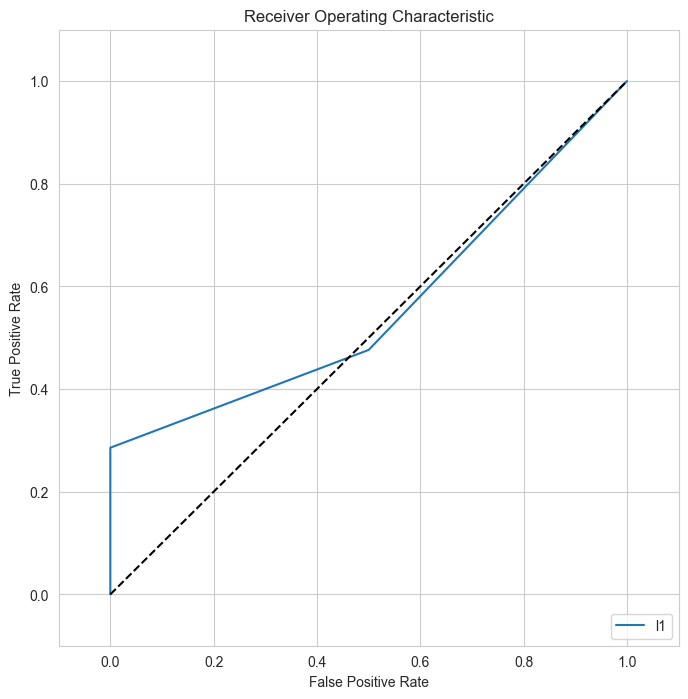

In [94]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [95]:
# Calculate AUC for Train
roc_auc_score(y_train, y_train_pred)

0.7102294031427889

In [96]:
print(auc(fpr, tpr))

0.5595238095238095


In [97]:
data["DecisionTree"] = {"train_accuracy": np.mean(train_accuracies), "test_accuracy": np.mean(test_accuracies)}

#### Feature Importance

In [98]:
## Building the model again with the best hyperparameters
model = DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=6, max_depth=4)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=6)

In [99]:
indices = np.argsort(-model.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Total_Bilirubin
Alkaline_Phosphotase
Alamine_Aminotransferase
Age
Direct_Bilirubin
Total_Protiens
Aspartate_Aminotransferase
Albumin
Gender
Albumin_and_Globulin_Ratio


## Model-6 SVC

In [100]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

# Function for parameter selection
def svc_param_selection(X_train, y_train, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma': gammas}
    grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

# Initialize lists to store accuracy scores
train_accuracies = []
test_accuracies = []

# Loop for 5 times
for _ in range(5):
    # Perform parameter selection
    best_params = svc_param_selection(X_train, y_train, nfolds=5)
    
    # Instantiate SVC with best parameters
    svc_classifier = SVC(kernel='rbf', C=best_params.C, gamma=best_params.gamma)
    
    # Fit the classifier on the training data
    svc_classifier.fit(X_train, y_train)

    # Predict Train set results
    y_train_pred = svc_classifier.predict(X_train)

    # Predict Test set results
    y_pred = svc_classifier.predict(X_test)

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_pred)
    
    # Append accuracies to the lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Print average accuracies
print("Average Train Accuracy:", np.mean(train_accuracies))
print("Average Test Accuracy:", np.mean(test_accuracies))


Average Train Accuracy: 0.7121495327102804
Average Test Accuracy: 0.7241379310344828


In [101]:
confusion_matrix(y_test, y_pred).T

array([[ 0,  0],
       [ 8, 21]], dtype=int64)

In [102]:
y_pred_proba = model.predict(X_test)

In [103]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

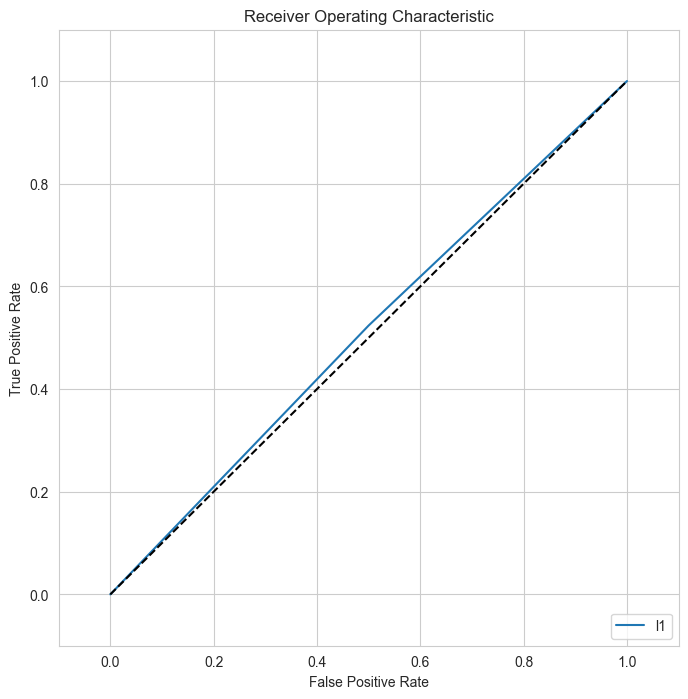

In [104]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [105]:
# Calculate AUC for Train
roc_auc_score(y_train, y_train_pred)

0.5

In [106]:
print(auc(fpr, tpr))

0.5119047619047619


In [107]:
data["SVC"] = {"train_accuracy": np.mean(train_accuracies), "test_accuracy": np.mean(test_accuracies)}

## Model-7 Gradient Boosting

In [108]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

# Initialize lists to store accuracy scores
train_accuracies = []
test_accuracies = []

# Loop for 5 times
for _ in range(5):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create Gradient Boosting Classifier object
    gbclass = GradientBoostingClassifier(
                        random_state=1000,
                        verbose=0,
                        n_estimators=10,
                        learning_rate=0.9,
                        loss='log_loss',
                        max_depth=3
                       )
    
    # Train the model using the training sets
    gbclass.fit(X_train, y_train)
    
    # Predict Train set results
    y_train_pred = gbclass.predict(X_train)

    # Predict Test set results
    y_pred = gbclass.predict(X_test)

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_pred)
    
    # Append accuracies to the lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    # Print scores and other metrics
    gbclass_score = round(gbclass.score(X_train, y_train) * 100, 2)
    gbclass_score_test = round(gbclass.score(X_test, y_test) * 100, 2)
    print('Score: \n', gbclass_score)
    print('Test Score: \n', gbclass_score_test)
    print('Accuracy: \n', test_accuracy)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

# Print average accuracies
print("Average Train Accuracy:", np.mean(train_accuracies))
print("Average Test Accuracy:", np.mean(test_accuracies))


Score: 
 88.03
Test Score: 
 71.68
Accuracy: 
 0.7168141592920354
[[13 19]
 [13 68]]
              precision    recall  f1-score   support

           0       0.50      0.41      0.45        32
           1       0.78      0.84      0.81        81

    accuracy                           0.72       113
   macro avg       0.64      0.62      0.63       113
weighted avg       0.70      0.72      0.71       113

Score: 
 88.03
Test Score: 
 71.68
Accuracy: 
 0.7168141592920354
[[13 19]
 [13 68]]
              precision    recall  f1-score   support

           0       0.50      0.41      0.45        32
           1       0.78      0.84      0.81        81

    accuracy                           0.72       113
   macro avg       0.64      0.62      0.63       113
weighted avg       0.70      0.72      0.71       113

Score: 
 88.03
Test Score: 
 71.68
Accuracy: 
 0.7168141592920354
[[13 19]
 [13 68]]
              precision    recall  f1-score   support

           0       0.50      0.41   

In [109]:
y_pred_proba = gbclass.predict_proba(X_test)[:,1]

In [110]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

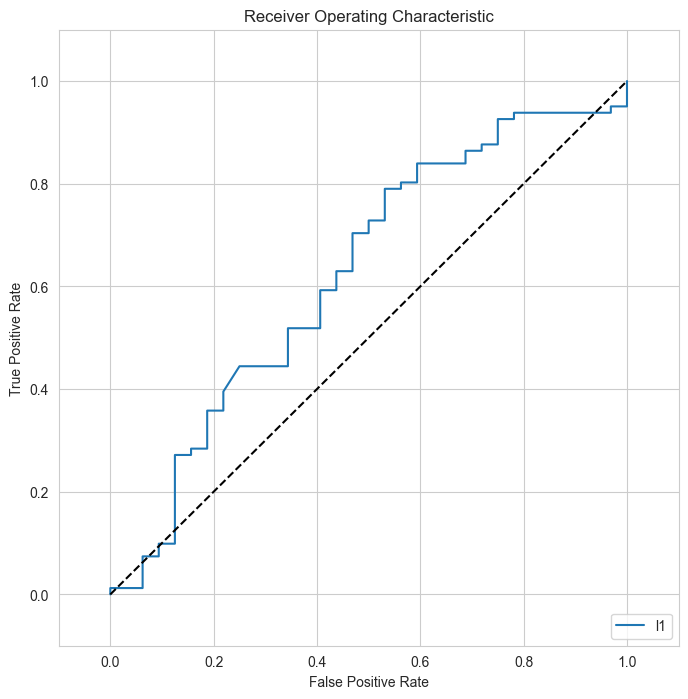

In [111]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [112]:
roc_auc_score(y_train,y_train_pred )

0.8335010783608914

In [113]:
# Calculate AUC for Test
print(auc(fpr, tpr))

0.6222993827160493


In [114]:
data["GradientBoost"] = {"train_accuracy": np.mean(train_accuracies), "test_accuracy": np.mean(test_accuracies)}

# Neural Networks

In [115]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np

# Initialize lists to store accuracy scores
train_accuracies = []
test_accuracies = []

# Loop for 5 times
for _ in range(5):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create MLPClassifier object
    neural = MLPClassifier(hidden_layer_sizes=400,
                     activation='relu',
                     solver='adam',
                     alpha=0.001,
                     batch_size=8,
                     max_iter=1000,
                     random_state=137,
                     tol=0.0001,
                     early_stopping=False,
                     validation_fraction=0.001,
                     beta_1=0.9,
                     beta_2=0.999,
                     epsilon=1e-08,
                     learning_rate='invscaling',
                     power_t=0.5,
                     momentum=0.8,
                     nesterovs_momentum=True,
                     shuffle=True,
                     learning_rate_init=0.001)
    
    # Fit the model on the training data
    neural.fit(X_train, y_train)
    
    # Predict Train set results
    y_train_pred = neural.predict(X_train)

    # Predict Test set results
    y_pred = neural.predict(X_test)

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_pred)
    
    # Append accuracies to the lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    # Print scores and other metrics
    neural_score = round(neural.score(X_train, y_train) * 100, 2)
    neural_score_test = round(neural.score(X_test, y_test) * 100, 2)
    print('Neural Score: \n', neural_score)
    print('Neural Test Score: \n', neural_score_test)
    print('Accuracy: \n', test_accuracy)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

# Print average accuracies
print("Average Train Accuracy:", np.mean(train_accuracies))
print("Average Test Accuracy:", np.mean(test_accuracies))


Neural Score: 
 59.2
Neural Test Score: 
 58.41
Accuracy: 
 0.584070796460177
[[26  6]
 [41 40]]
              precision    recall  f1-score   support

           0       0.39      0.81      0.53        32
           1       0.87      0.49      0.63        81

    accuracy                           0.58       113
   macro avg       0.63      0.65      0.58       113
weighted avg       0.73      0.58      0.60       113

Neural Score: 
 59.2
Neural Test Score: 
 58.41
Accuracy: 
 0.584070796460177
[[26  6]
 [41 40]]
              precision    recall  f1-score   support

           0       0.39      0.81      0.53        32
           1       0.87      0.49      0.63        81

    accuracy                           0.58       113
   macro avg       0.63      0.65      0.58       113
weighted avg       0.73      0.58      0.60       113

Neural Score: 
 59.2
Neural Test Score: 
 58.41
Accuracy: 
 0.584070796460177
[[26  6]
 [41 40]]
              precision    recall  f1-score   support



In [116]:
y_pred_proba = neural.predict_proba(X_test)[:,1]

In [117]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

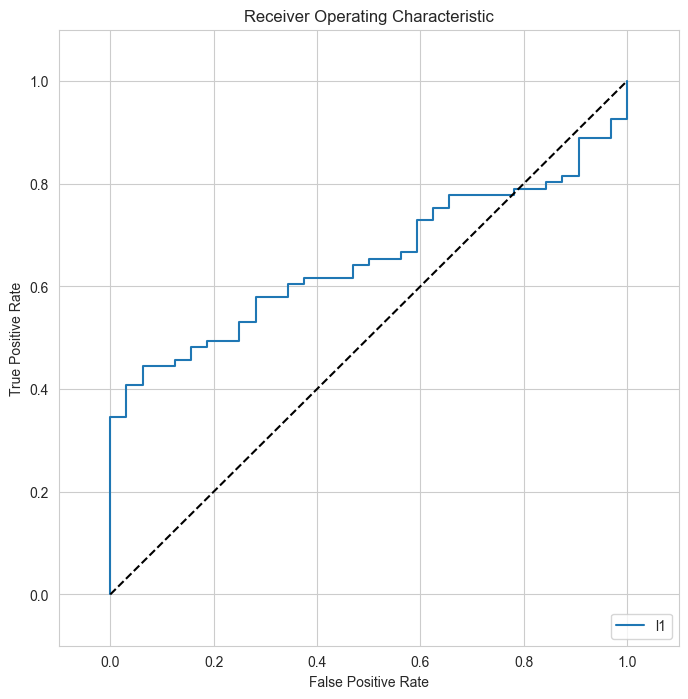

In [118]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [119]:
roc_auc_score(y_train,y_train_pred )

0.6813563383656841

In [120]:
# Calculate AUC for Test
print(auc(fpr, tpr))

0.6508487654320988


In [121]:
data["NeuralNetwork"] = {"train_accuracy": np.mean(train_accuracies), "test_accuracy": np.mean(test_accuracies)}

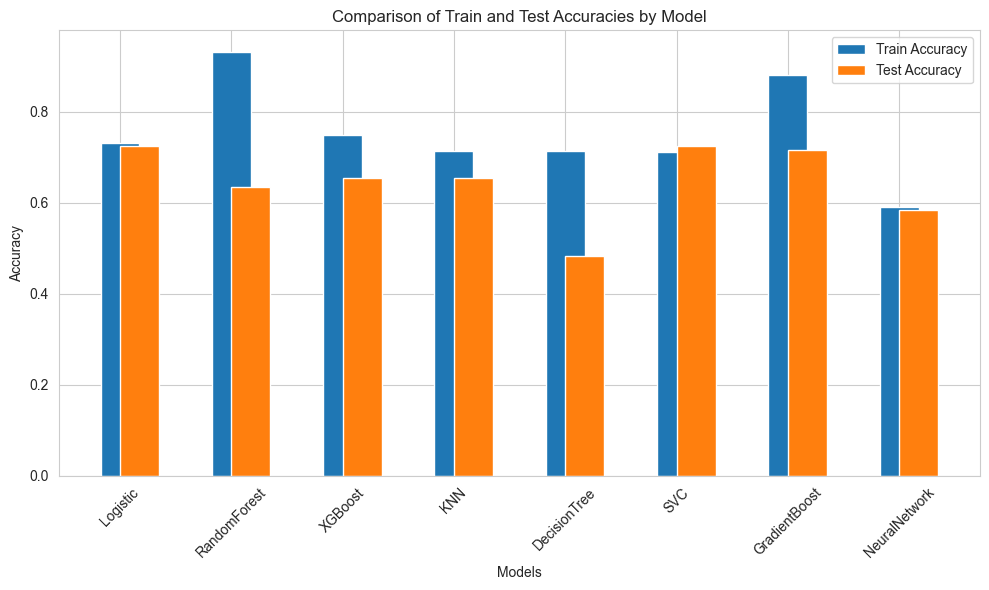

In [122]:
# Extracting data for plotting
models = list(data.keys())
train_accuracies = [data[model]['train_accuracy'] for model in models]
test_accuracies = [data[model]['test_accuracy'] for model in models]

x = range(len(models))

# Plotting
plt.figure(figsize=(10, 6))
bar_width = 0.35
plt.bar(x, train_accuracies, bar_width, label='Train Accuracy')
plt.bar(x, test_accuracies, bar_width, align='edge', label='Test Accuracy')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Train and Test Accuracies by Model')
plt.xticks(x, models, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

# Final Proposed Model with Synthetic Data Generation

In [123]:
# Finding Conditions for Synthetic Data Generation
import pandas as pd

# Load the dataset
# Replace 'your_dataset.csv' with the actual filename of your dataset
df = pd.read_csv('indian_liver_patient.csv')

# Step 1: Extract unique values for the 'Dataset' column
classes = df['Dataset'].unique()

# Step 2: Calculate ranges for each feature and class/category
feature_ranges = {}
for feature in df.columns[:-1]:  # Exclude the last column which is the 'Dataset' column
    feature_ranges[feature] = {}
    for cls in classes:
        cls_data = df[df['Dataset'] == cls][feature]
        min_val = cls_data.min()
        max_val = cls_data.max()
        feature_ranges[feature][cls] = (min_val, max_val)

# Step 3: Print or store the ranges for each feature and class/category
for feature, ranges in feature_ranges.items():
    print(f"Ranges for feature '{feature}':")
    for cls, (min_val, max_val) in ranges.items():
        print(f"Class {cls}: Min={min_val}, Max={max_val}")


Ranges for feature 'Age':
Class 1: Min=7, Max=90
Class 2: Min=4, Max=85
Ranges for feature 'Gender':
Class 1: Min=Female, Max=Male
Class 2: Min=Female, Max=Male
Ranges for feature 'Total_Bilirubin':
Class 1: Min=0.4, Max=75.0
Class 2: Min=0.5, Max=7.3
Ranges for feature 'Direct_Bilirubin':
Class 1: Min=0.1, Max=19.7
Class 2: Min=0.1, Max=3.6
Ranges for feature 'Alkaline_Phosphotase':
Class 1: Min=63, Max=2110
Class 2: Min=90, Max=1580
Ranges for feature 'Alamine_Aminotransferase':
Class 1: Min=12, Max=2000
Class 2: Min=10, Max=181
Ranges for feature 'Aspartate_Aminotransferase':
Class 1: Min=11, Max=4929
Class 2: Min=10, Max=285
Ranges for feature 'Total_Protiens':
Class 1: Min=2.7, Max=9.6
Class 2: Min=3.7, Max=9.2
Ranges for feature 'Albumin':
Class 1: Min=0.9, Max=5.5
Class 2: Min=1.4, Max=5.0
Ranges for feature 'Albumin_and_Globulin_Ratio':
Class 1: Min=0.3, Max=2.8
Class 2: Min=0.37, Max=1.9


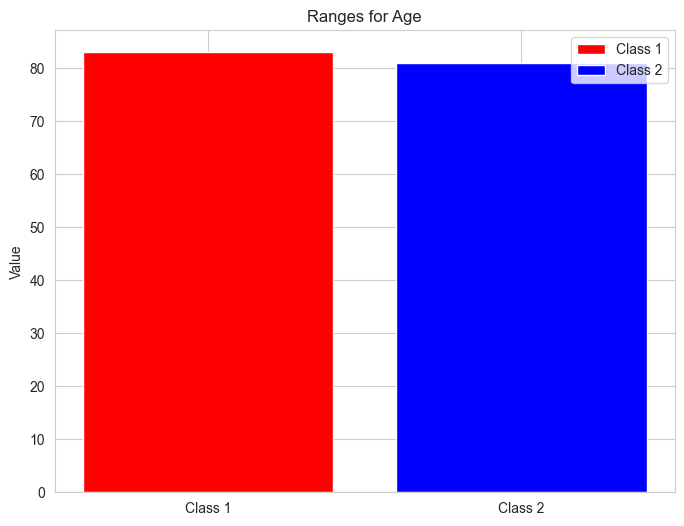

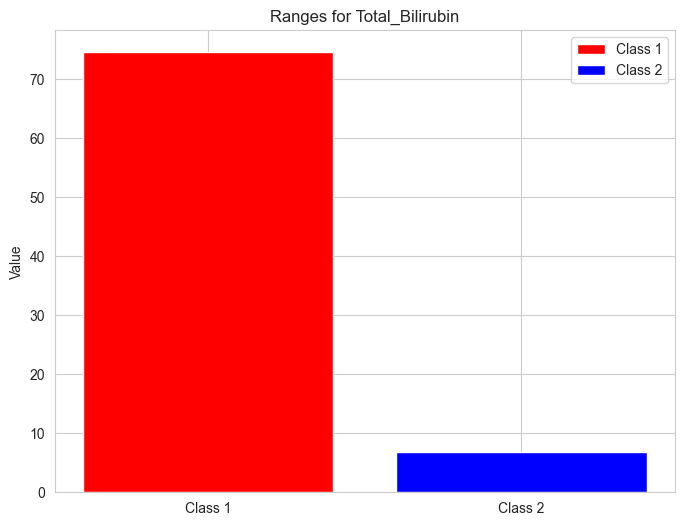

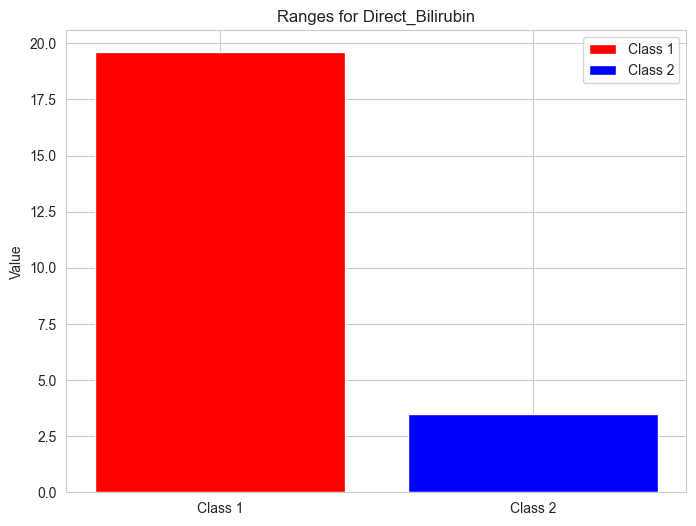

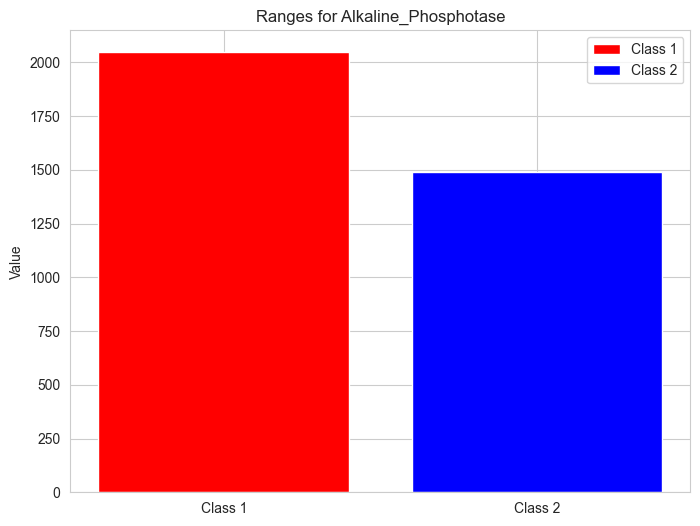

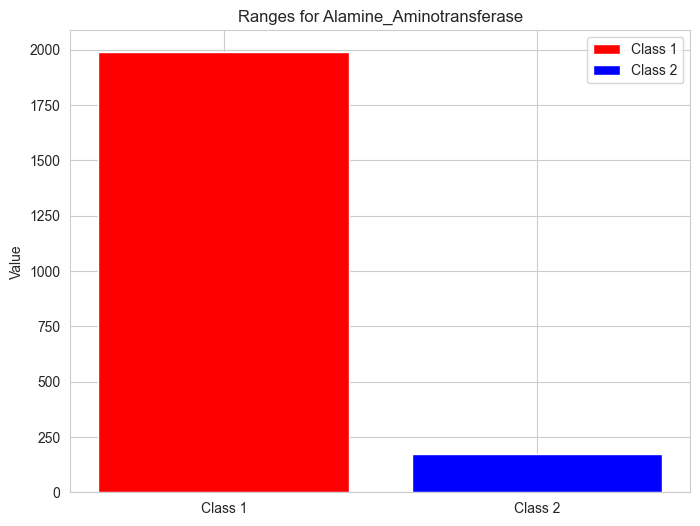

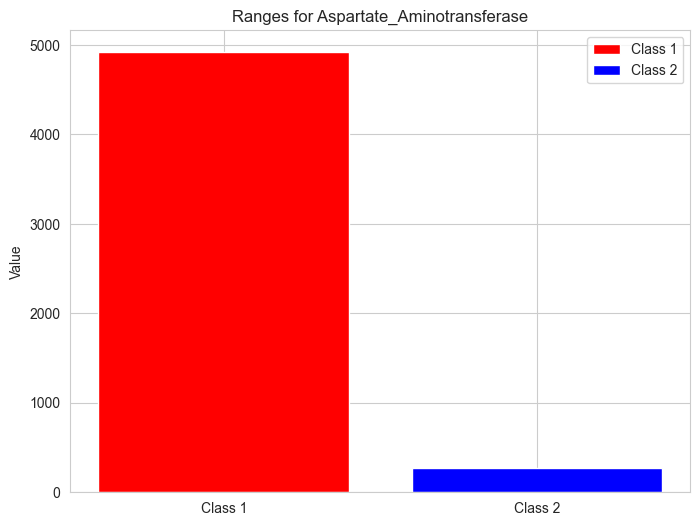

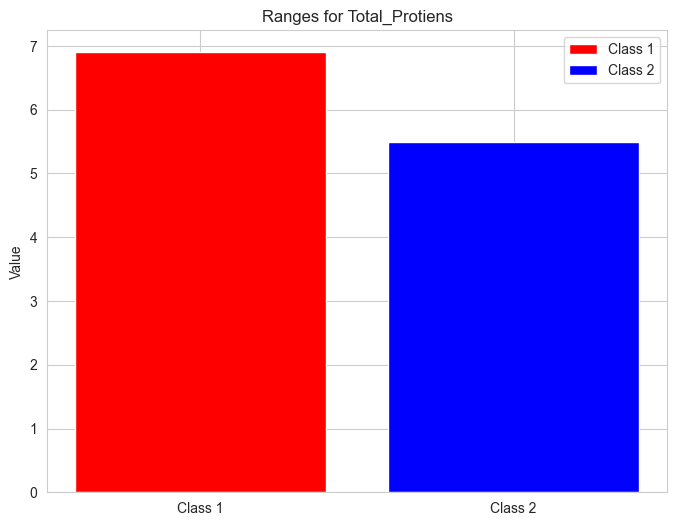

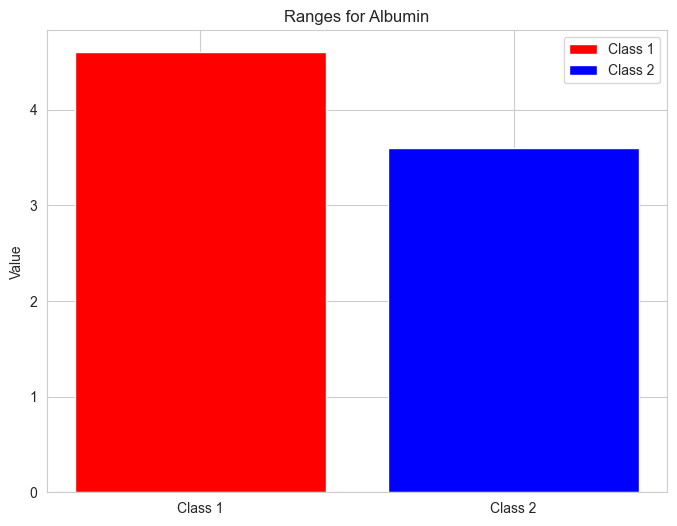

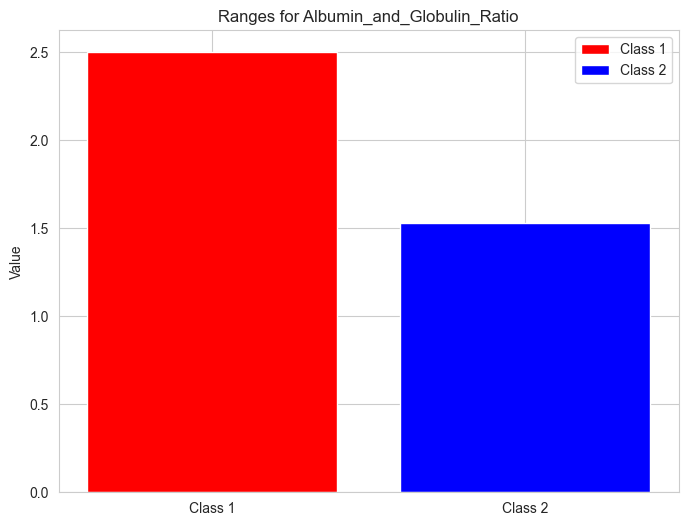

In [124]:
import matplotlib.pyplot as plt

# Data for each feature
features = [
    'Age', 
    'Total_Bilirubin', 
    'Direct_Bilirubin', 
    'Alkaline_Phosphotase', 
    'Alamine_Aminotransferase', 
    'Aspartate_Aminotransferase', 
    'Total_Protiens', 
    'Albumin', 
    'Albumin_and_Globulin_Ratio'
]

# Ranges for each feature
feature_ranges = {
    'Age': {'Class 1': (7, 90), 'Class 2': (4, 85)},
    'Total_Bilirubin': {'Class 1': (0.4, 75.0), 'Class 2': (0.5, 7.3)},
    'Direct_Bilirubin': {'Class 1': (0.1, 19.7), 'Class 2': (0.1, 3.6)},
    'Alkaline_Phosphotase': {'Class 1': (63, 2110), 'Class 2': (90, 1580)},
    'Alamine_Aminotransferase': {'Class 1': (12, 2000), 'Class 2': (10, 181)},
    'Aspartate_Aminotransferase': {'Class 1': (11, 4929), 'Class 2': (10, 285)},
    'Total_Protiens': {'Class 1': (2.7, 9.6), 'Class 2': (3.7, 9.2)},
    'Albumin': {'Class 1': (0.9, 5.5), 'Class 2': (1.4, 5.0)},
    'Albumin_and_Globulin_Ratio': {'Class 1': (0.3, 2.8), 'Class 2': (0.37, 1.9)}
}

# Define colors
class_colors = {
    'Class 1': 'red',
    'Class 2': 'blue'
}

# Plotting separate charts for each feature
for feature in features:
    fig, ax = plt.subplots(figsize=(8, 6))
    ranges = feature_ranges[feature]
    ax.bar('Class 1', ranges['Class 1'][1] - ranges['Class 1'][0], color=class_colors['Class 1'], label='Class 1')
    ax.bar('Class 2', ranges['Class 2'][1] - ranges['Class 2'][0], color=class_colors['Class 2'], label='Class 2')
    ax.set_ylabel('Value')
    ax.set_title(f'Ranges for {feature}')
    ax.legend()
    plt.show()


In [125]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def predict_liver_disease(age, total_bilirubin, direct_bilirubin, alkaline_phosphotase, alamine_aminotransferase, aspartate_aminotransferase, total_proteins, albumin, albumin_and_globulin_ratio):
    # Check if all features indicate liver disease
    class_1_count = 0
    class_2_count = 0

    # Age
    if age > 85:
        class_1_count += 1
    elif age < 7: 
        class_2_count += 1

    # Total_Bilirubin
    if 7.4 <= total_bilirubin <= 75:
        class_1_count += 1

    # Direct_Bilirubin
    if 3.7 <= direct_bilirubin <= 19.7:
        class_1_count += 1

    # Alkaline_Phosphotase
    if 1581 <= alkaline_phosphotase <= 2110 or alkaline_phosphotase < 90:
        class_1_count += 1

    # Alamine_Aminotransferase
    if 182 <= alamine_aminotransferase <= 2000:
        class_1_count += 1
    elif 10 <= alamine_aminotransferase <= 12:
        class_2_count += 1

    # Aspartate_Aminotransferase
    if 286 <= aspartate_aminotransferase <= 4929:
        class_1_count += 1
    elif 10 == aspartate_aminotransferase:
        class_2_count += 1

    # Total_Protiens
    if 9.3 <= total_proteins <= 9.6 or 2.7 <= total_proteins <= 3.6:
        class_1_count += 1

    # Albumin
    if 5.1 <= albumin <= 5.5 or 0.9 <= albumin <= 1.3:
        class_1_count += 1

    # Albumin_and_Globulin_Ratio
    if 2 <= albumin_and_globulin_ratio <= 2.8 or 0.3 <= albumin_and_globulin_ratio <= 0.36:
        class_1_count += 1


    # Check severity
    if class_1_count > 0:
        return "Severe case"
    elif class_2_count > 0:
        return "Healthy"
    else:
        return None


# Function to generate synthetic data within specified liver cirrhosis ranges
def generate_synthetic_data(num_samples):

    # Labeling data based on the provided function
    severities = []
    data = {
        'Age': [],
        'Total_Bilirubin': [],
        'Direct_Bilirubin': [],
        'Alkaline_Phosphotase': [],
        'Alamine_Aminotransferase': [],
        'Aspartate_Aminotransferase': [],
        'Total_Protiens': [],
        'Albumin': [],
        'Albumin_and_Globulin_Ratio': []
    }
    while len(severities) < num_samples:

        # Randomly select the range for Alkaline_Phosphatase
        random_range = np.random.choice([0, 1])
        # Generate random values based on the selected range
        if random_range == 0:
            alkaline_phosphatase = np.random.uniform(63, 90, 1)
        else:
            alkaline_phosphatase = np.random.uniform(1581, 2110, 1)

        random_range = np.random.choice([0, 1])
        if random_range == 0:
            total_proteins = np.random.uniform(9.3, 9.6, 1)
        else:
            total_proteins = np.random.uniform(2.7, 3.6, 1)

        random_range = np.random.choice([0, 1])
        if random_range == 0:
            albumin = np.random.uniform(5.1, 5.5, 1)
        else:
            albumin = np.random.uniform(0.9, 1.3, 1)

        random_range = np.random.choice([0, 1])
        if random_range == 0:
            albumin_and_globulin_ratio = np.random.uniform(2, 2.8, 1)
        else:
            albumin_and_globulin_ratio = np.random.uniform(0.3, 0.36, 1)
        
        temp = {
          # 'Gender': np.random.choice([0, 1]),
          'Age': np.random.uniform(7, 90, 1),
          'Total_Bilirubin': np.random.uniform(7.4, 75.0, 1),
          'Direct_Bilirubin': np.random.uniform(3.7, 19.7, 1),
          'Alkaline_Phosphotase': alkaline_phosphatase,
          'Alamine_Aminotransferase': np.random.uniform(182, 2000, 1),  # Adjusted range
          'Aspartate_Aminotransferase': np.random.uniform(286, 4929, 1),  # Adjusted range
          'Total_Protiens': total_proteins,
          'Albumin': albumin,
          'Albumin_and_Globulin_Ratio': albumin_and_globulin_ratio,
        }

        severity = predict_liver_disease(*temp.values())


        if severity == 'Severe case' and severities.count(1) < num_samples:
            severities.append(1)
            for key in data.keys():
              data[key].append(temp[key][0])
        if len(severities) == num_samples:
            break

    while len(severities) < num_samples*2:
        
        temp = {
          # 'Gender': np.random.choice([0, 1]),
          'Age': np.random.uniform(4, 85, 1),
          'Total_Bilirubin': np.random.uniform(0.4, 7.4, 1),
          'Direct_Bilirubin': np.random.uniform(0.1, 3.6, 1),
          'Alkaline_Phosphotase': np.random.uniform(90, 1580, 1),
          'Alamine_Aminotransferase': np.random.uniform(10, 181, 1),  # Adjusted range
          'Aspartate_Aminotransferase': np.random.uniform(10, 285, 1),  # Adjusted range
          'Total_Protiens': np.random.uniform(3.7, 9.2, 1),
          'Albumin': np.random.uniform(1.4, 5.0, 1),
          'Albumin_and_Globulin_Ratio': np.random.uniform(0.37, 1.9, 1),
        }

        severity = predict_liver_disease(*temp.values())


        if severity == 'Healthy' and severities.count(2) < num_samples:
            severities.append(2)
            for key in data.keys():
              data[key].append(temp[key][0])
        # elif severity == 'Treatable' and severities.count(3) < num_samples:
        #     severities.append(3)
        #     for key in data.keys():
        #       data[key].append(temp[key][0])

        if len(severities) == num_samples * 2:
            break

    data['Dataset'] = severities

    # Printing counts of each class
    print(f"Total Severe: {data['Dataset'].count(1)}")
    print(f"Total Healthy: {data['Dataset'].count(2)}")
    # print(f"Total Treatable: {data['Dataset'].count(3)}")

    return pd.DataFrame(data)




In [126]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# Generate synthetic data
num_samples = 500
synthetic_data = generate_synthetic_data(num_samples)

# if score==negative, mark 0; else 1
def partition(x):
    if x == 2:
        return 0
    return 1

synthetic_data['Dataset'] = synthetic_data['Dataset'].map(partition)

# Container for storing performance metrics
precision_results = []
recall_results = []
f1_results = []
accuracy_results = []

# Perform training and evaluation 5 times
for i in range(5):
    random_state_split = 122
    random_state_model = 122
    print(f"Iteration {i+1} with random_state_split={random_state_split} and random_state_model={random_state_model}")

    # Split data into features and target
    X = synthetic_data.drop(columns=['Dataset'])
    y = synthetic_data['Dataset']

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=random_state_split)

    # Train XGBoost model with the best parameters
    model = XGBClassifier(learning_rate=0.001, max_depth=1, n_estimators=100, reg_lambda=0.001, random_state=random_state_model)
    model.fit(X_train, y_train)

    # Load the Indian liver patient dataset (Replace this with your dataset loading code)
    df = pd.read_csv('indian_liver_patient.csv')
    df['Dataset'] = df['Dataset'].map(partition)

    # Drop rows with missing values
    df.dropna(inplace=True)

    # Create separate object for target variable
    y = df['Dataset']

    # Create separate object for input features
    X = df.drop(['Dataset', 'Gender'], axis=1)

    # Split X and y into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=random_state_split)

    # Train XGBoost model
    model.fit(X_train, y_train)

    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Calculate precision, recall, and F1 score
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)

    # Store results
    precision_results.append(precision)
    recall_results.append(recall)
    f1_results.append(f1)

    # Accuracy
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    print({"train_accuracy": train_accuracy, "test_accuracy": test_accuracy})

    # Store accuracy results
    accuracy_results.append({"train_accuracy": train_accuracy, "test_accuracy": test_accuracy})

    # Print random state
    print(f"Random State: {random_state_model}")

# Print average accuracy across all iterations
avg_train_accuracy = sum(result["train_accuracy"] for result in accuracy_results) / len(accuracy_results)
avg_test_accuracy = sum(result["test_accuracy"] for result in accuracy_results) / len(accuracy_results)
print("\nAverage Training Accuracy:", avg_train_accuracy)
print("Average Test Accuracy:", avg_test_accuracy)

# Calculate mean precision, recall, and F1 score
mean_precision = sum(precision_results) / len(precision_results)
mean_recall = sum(recall_results) / len(recall_results)
mean_f1 = sum(f1_results) / len(f1_results)

print("\nMean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1 Score:", mean_f1)


Total Severe: 500
Total Healthy: 500
Iteration 1 with random_state_split=122 and random_state_model=122
{'train_accuracy': 0.7036363636363636, 'test_accuracy': 0.9310344827586207}
Random State: 122
Iteration 2 with random_state_split=122 and random_state_model=122
{'train_accuracy': 0.7036363636363636, 'test_accuracy': 0.9310344827586207}
Random State: 122
Iteration 3 with random_state_split=122 and random_state_model=122
{'train_accuracy': 0.7036363636363636, 'test_accuracy': 0.9310344827586207}
Random State: 122
Iteration 4 with random_state_split=122 and random_state_model=122
{'train_accuracy': 0.7036363636363636, 'test_accuracy': 0.9310344827586207}
Random State: 122
Iteration 5 with random_state_split=122 and random_state_model=122
{'train_accuracy': 0.7036363636363636, 'test_accuracy': 0.9310344827586207}
Random State: 122

Average Training Accuracy: 0.7036363636363636
Average Test Accuracy: 0.9310344827586207

Mean Precision: 0.9310344827586207
Mean Recall: 1.0
Mean F1 Score: 0

In [127]:
data["SyntheticData"] = {"train_accuracy": avg_train_accuracy, "test_accuracy": avg_test_accuracy}

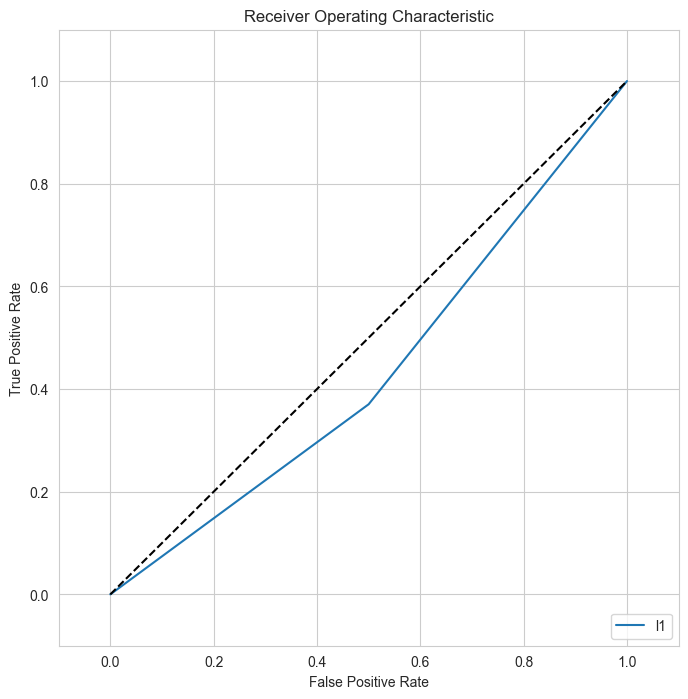

In [128]:
# Get just the prediction for the positive class (1)
y_pred_proba = model.predict_proba(X_test)[:,1]

# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

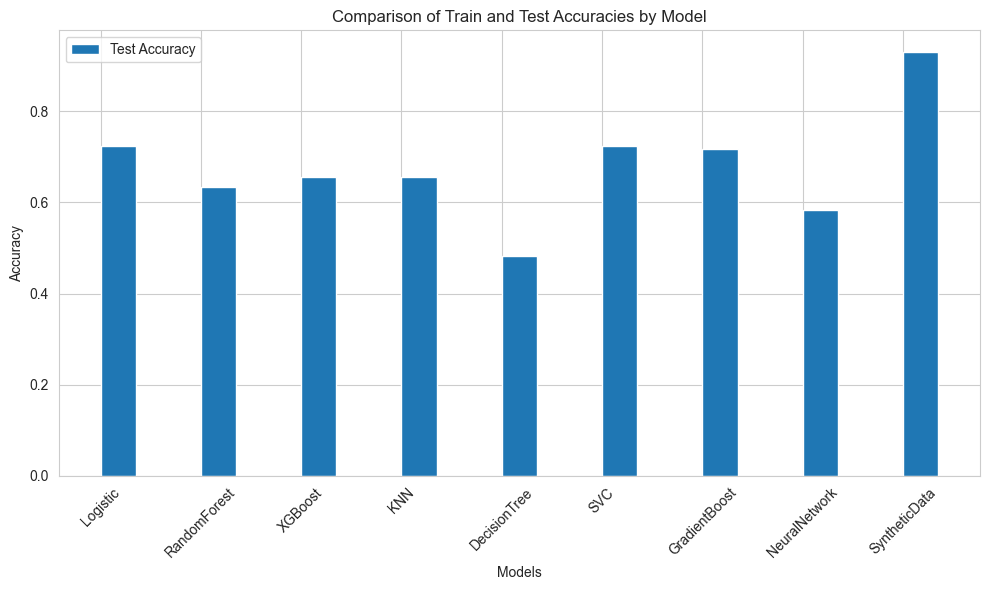

In [129]:
# Extracting data for plotting
models = list(data.keys())
# train_accuracies = [data[model]['train_accuracy'] for model in models]
test_accuracies = [data[model]['test_accuracy'] for model in models]

x = range(len(models))

# Plotting
plt.figure(figsize=(10, 6))
bar_width = 0.35
# plt.bar(x, train_accuracies, bar_width, label='Train Accuracy')
plt.bar(x, test_accuracies, bar_width, align='edge', label='Test Accuracy')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Train and Test Accuracies by Model')
plt.xticks(x, models, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

##  Save the winning model to disk

In [130]:
joblib.dump(model, 'synthethic_data_model.pkl')

['synthethic_data_model.pkl']